In [2]:
%matplotlib inline 
#notebook
import IPython
import pandas as pd
import matplotlib.pyplot as plt



def data_collection_process(thread_count):
    thread_path= "/Users/developer/PycharmProjects/serverless-function-placement/tests/6-Nodes/"
    thread="Thread-"+str(thread_count)
    dataCollect=[
             {"num":15, "label":""}, 
             {"num":15, "label":"-KF"}, 
             {"num":20, "label":""}, 
             {"num":20, "label":"-KF"},
             {"num":25, "label":""}, 
             {"num":25, "label":"-KF"},
             {"num":30, "label":""}, 
             {"num":30, "label":"-KF"},
            ]
    for item in dataCollect:
        file_path= "{}{}/fib-{}{}/main_core_requestlog.csv".format(thread_path,
                                                                         thread, 
                                                                         item['num'], item['label'])
        #print(file_path)
        try:
            d_frame=pd.read_csv(file_path, nrows=500)
            #print(d_frame.describe())
            latency=d_frame.iloc[:,2]
            item['latency']=latency
            item['mean']= d_frame.iloc[:,2].mean()


        except:
            continue
            
    return dataCollect


#dataCollect= data_collection_process(3)

# dataMemCollect = data_collection_process(1,'MEM')
#print(dataCollect)

#fig1, (ax1) = plt.subplots() #1, 2, figsize=(10, 3)
#ax1.set_title('Latency Plot CPU 3 Thread & 7 nodes')
#labels = ["{}{}".format(item['num'],item['label']) for item in dataCollect]
#ax1.set_ylabel("Seconds")
#box1=ax1.boxplot([item['latency'] for item in dataCollect], labels=labels, patch_artist=False);





#fig1, ax1 = plt.subplots()
print("-----------------------")

dataCollect= [data_collection_process(1), data_collection_process(2), data_collection_process(3),data_collection_process(4)]



for value in dataCollect:
    list_of_median=[]

    for index, value in enumerate(value):
        list_of_median.append((value['num'], value['label'],value['mean']))
    #print(list_of_median)
    
    df = pd.DataFrame(list_of_median)
    display(df.pivot(index=0, columns=[0, 1],values=2))
    
    print("------------------------")




-----------------------


0         15                 20                  25                  30  \
1                 -KF                 -KF                 -KF             
0                                                                         
15  2.134446  1.90119       NaN       NaN       NaN       NaN       NaN   
20       NaN      NaN  2.073616  1.845276       NaN       NaN       NaN   
25       NaN      NaN       NaN       NaN  2.099679  1.800118       NaN   
30       NaN      NaN       NaN       NaN       NaN       NaN  2.374581   

0             
1        -KF  
0             
15       NaN  
20       NaN  
25       NaN  
30  2.251255

------------------------


0         15                  20                  25                  30  \
1                  -KF                 -KF                 -KF             
0                                                                          
15  2.082234  1.781532       NaN       NaN       NaN       NaN       NaN   
20       NaN       NaN  1.993193  1.792835       NaN       NaN       NaN   
25       NaN       NaN       NaN       NaN  2.152328  1.691813       NaN   
30       NaN       NaN       NaN       NaN       NaN       NaN  2.507196   

0            
1       -KF  
0            
15      NaN  
20      NaN  
25      NaN  
30  2.16062

------------------------


0         15                  20                  25                 30  \
1                  -KF                 -KF                 -KF            
0                                                                         
15  2.063109  1.767147       NaN       NaN       NaN       NaN      NaN   
20       NaN       NaN  2.019512  1.717343       NaN       NaN      NaN   
25       NaN       NaN       NaN       NaN  1.970764  1.677782      NaN   
30       NaN       NaN       NaN       NaN       NaN       NaN  2.27729   

0             
1        -KF  
0             
15       NaN  
20       NaN  
25       NaN  
30  2.217819

------------------------


0         15                  20                 25                  30  \
1                  -KF                 -KF                -KF             
0                                                                         
15  2.003207  1.620581       NaN       NaN      NaN       NaN       NaN   
20       NaN       NaN  1.919057  1.787031      NaN       NaN       NaN   
25       NaN       NaN       NaN       NaN  1.98083  1.739239       NaN   
30       NaN       NaN       NaN       NaN      NaN       NaN  2.409868   

0             
1        -KF  
0             
15       NaN  
20       NaN  
25       NaN  
30  2.369013

------------------------


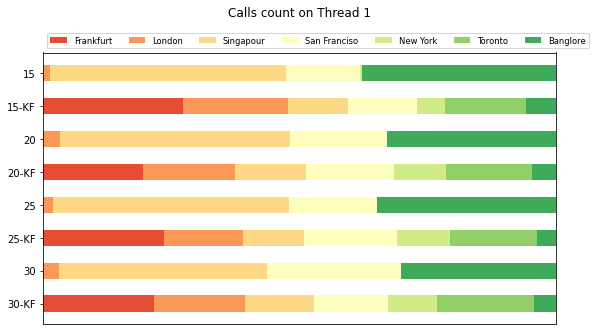

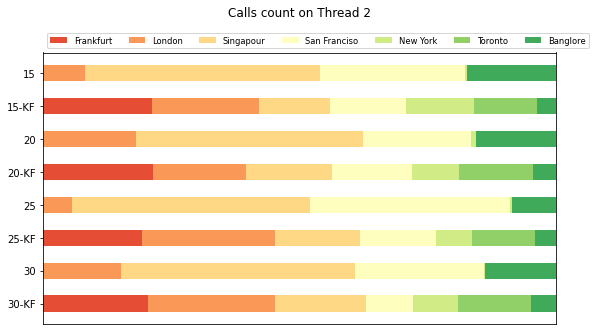

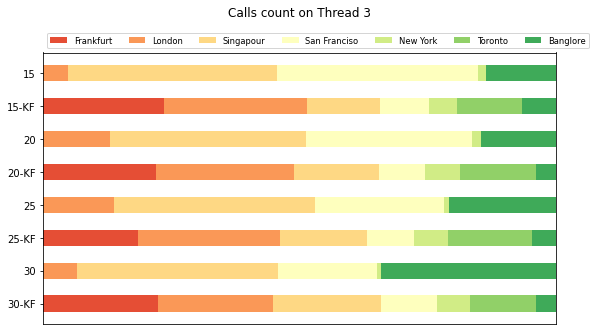

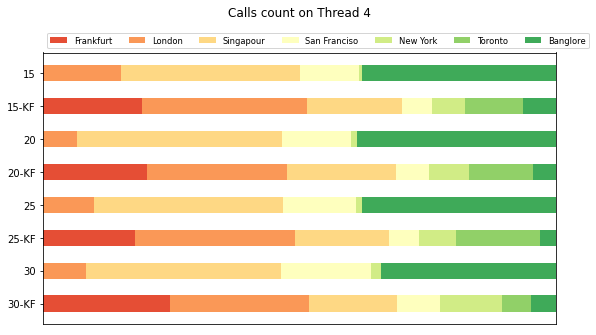

In [106]:
%matplotlib inline 
#notebook
import IPython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def survey(results, category_names):

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax




def data_counter_process(thread_count):
    thread_path= "/Users/developer/PycharmProjects/serverless-function-placement/tests/6-Nodes/"
    thread="Thread-"+str(thread_count)
    dataCollect=[
             {"num":15, "label":""}, 
             {"num":15, "label":"-KF"}, 
             {"num":20, "label":""}, 
             {"num":20, "label":"-KF"},
             {"num":25, "label":""}, 
             {"num":25, "label":"-KF"},
             {"num":30, "label":""}, 
             {"num":30, "label":"-KF"},
            ]
    for item in dataCollect:
        file_path= "{}{}/fib-{}{}/main_core_requestlog.csv".format(thread_path,
                                                                         thread, 
                                                                         item['num'], item['label'])
        #print(file_path)
        try:
            d_frame=pd.read_csv(file_path, sep=',', 
                    nrows=500,
                  names=["id", "function", "latency", "url","req_time","res_time","node_id","processing_type","request_method"])
            
            item['count']=d_frame.groupby(['node_id']).size().to_dict()
    
        except:
            continue
            
    return dataCollect


def result_set_generate(thread_count):
    res_dict=data_counter_process(thread_count)
    dict_results={}
    #print(res_dict)
    for data in res_dict:
        series = pd.Series(data['count'], index =[1,3,4,5,6,7,8]).fillna(0)
       
        dict_results[str(data['num'])+str(data['label'])]=series.values.tolist()
        
    return dict_results



def generate_graph(thread_count):
    category_names = [ 'Frankfurt', 'London', 'Singapour','San Franciso', 'New York', 'Toronto','Banglore']
    survey(result_set_generate(thread_count), category_names)

    plt.title('Calls count on Thread '+str(thread_count)+'\n\n')
    plt.show()


generate_graph(1)
generate_graph(2)
generate_graph(3)
generate_graph(4)

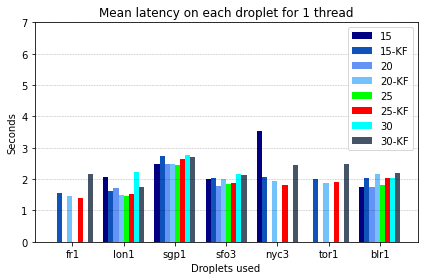

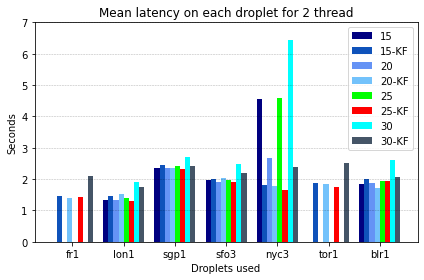

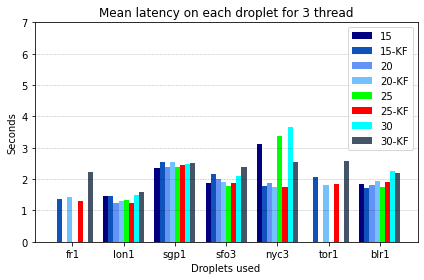

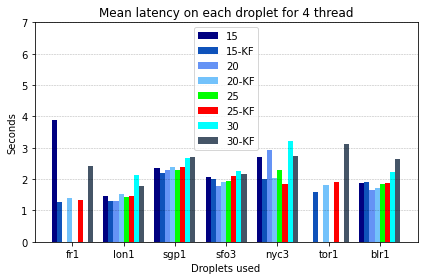

In [104]:
%matplotlib inline 
#notebook
import IPython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def data_latency_process(thread_count):
    thread_path= "/Users/developer/PycharmProjects/serverless-function-placement/tests/6-Nodes/"
    thread="Thread-"+str(thread_count)
    dataCollect=[
             {"num":15, "label":""}, 
             {"num":15, "label":"-KF"}, 
             {"num":20, "label":""}, 
             {"num":20, "label":"-KF"},
             {"num":25, "label":""}, 
             {"num":25, "label":"-KF"},
             {"num":30, "label":""}, 
             {"num":30, "label":"-KF"},
            ]
    for item in dataCollect:
        file_path= "{}{}/fib-{}{}/main_core_requestlog.csv".format(thread_path,
                                                                         thread, 
                                                                         item['num'], item['label'])
        #print(file_path)
        try:
            d_frame=pd.read_csv(file_path, sep=',', 
                    nrows=500,
                  names=["id", "function", "latency", "url","req_time","res_time","node_id","processing_type","request_method"])
            
            item['count']=d_frame.groupby(['node_id']).agg({"latency": "mean"}).to_dict()
    
        except:
            continue
            
    return dataCollect

def result_set_generate(thread_count):
    res_dict=data_latency_process(thread_count)
    dict_results=[]
    for data in res_dict:
        series = pd.Series(data['count']['latency'], index =[1,3,4,5,6,7,8]).fillna(0)
       
        dict_results.append(series.values.tolist())
        
    numpy_array = np.array(dict_results)
    transpose = numpy_array.T
    transpose_list = transpose.tolist()


    return np.array(transpose_list)


def plot_bar_graph(data, thread):
    
    length = len(data)
    x_labels = ['fr1', 'lon1', 'sgp1', 'sfo3', 'nyc3', 'tor1', 'blr1']

    # Set plot parameters
    fig, ax = plt.subplots()
    width = 0.1 # width of bar
    x = np.arange(length)

    ax.bar(x - (2 * width), data[:,0], width, color='#000080', label='15')
    ax.bar(x - (1 * width), data[:,1], width, color='#0F52BA', label='15-KF', )
    ax.bar(x + (0 * width), data[:,2], width, color='#6593F5', label='20', )
    ax.bar(x + (1 * width), data[:,3], width, color='#73C2FB', label='20-KF', )
    ax.bar(x + (2 * width), data[:,4], width, color='#00FF00', label='25', )
    ax.bar(x + (3 * width), data[:,5], width, color='#FF0000', label='25-KF', )
    ax.bar(x + (4 * width), data[:,6], width, color='#00FFFF', label='30', )
    ax.bar(x + (5 * width), data[:,7], width, color='#455567', label='30-KF', )

    ax.set_ylabel('Seconds')
    ax.set_ylim(0,7)
    ax.set_xticks(x + width + width/2)
    ax.set_xticklabels(x_labels)
    ax.set_xlabel('Droplets used')
    ax.set_title('Mean latency on each droplet for '+str(thread)+' thread')
    ax.legend()
    plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

    fig.tight_layout()
    plt.show()


#print(result_set_generate(1))
plot_bar_graph(result_set_generate(1),1)
plot_bar_graph(result_set_generate(2),2)
plot_bar_graph(result_set_generate(3),3)
plot_bar_graph(result_set_generate(4),4)